<a href="https://colab.research.google.com/github/budsayamasNithi/AI/blob/main/CNN_CAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, Activation, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.models import load_model
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly import tools
import plotly
import cv2 #OpenCV
from keras.callbacks import ModelCheckpoint

In [2]:
cat = cv2.imread('/content/cat.jpg')
cat.shape

(168, 300, 3)

# Create a Model with 2D CNN Layer
นิยาม Model แบบ 2D Convolution โดยรับ Input Image ขนาด 1080x1,440 Pixel แบบ 3 Channel โดยมี Filter ขนาด 3 x 3 จำนวน 3 Filter เพื่อนำไป Slide บน Input Image ของแต่ละ Channel

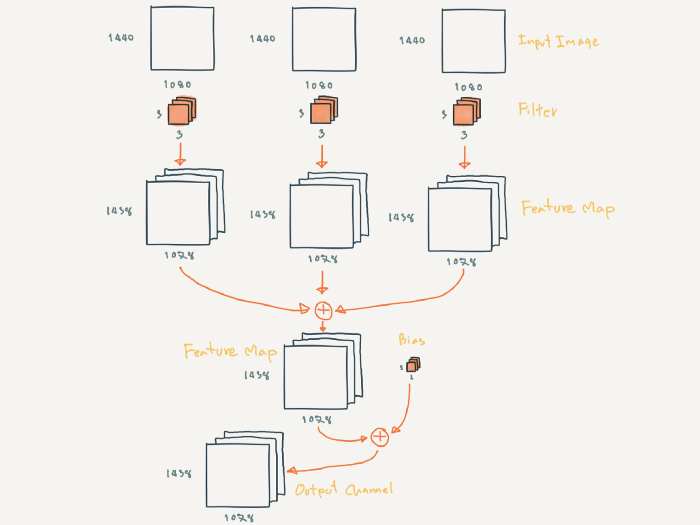

In [35]:
model = Sequential()
model.add(Conv2D(3,    # number of filter layers
                (3,    # y dimension of kernel
                 3),   # x dimension of kernel (3*3)
                 input_shape=cat.shape))

In [36]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 166, 298, 3)       84        
                                                                 
Total params: 84
Trainable params: 84
Non-trainable params: 0
_________________________________________________________________


In [37]:
model = Sequential()
model.add(Conv2D(3,(10,10),input_shape=cat.shape))
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 159, 291, 3)       903       
                                                                 
Total params: 903
Trainable params: 903
Non-trainable params: 0
_________________________________________________________________


ทดลองขยายมิติของภาพจาก 3 มิติเป็น 4 มิติ เพื่อเตรียมนำเข้า Predict Function โดยเลขตัวแรกคือจำนวนภาพ มี 1 ภาพ

In [38]:
cat_batch = np.expand_dims(cat,axis=0)
cat_batch.shape

(1, 168, 300, 3)

ทดลอง predict Model โดยใช้ค่า Weight และ Bias แบบสุ่มในตอนเริ่มต้น โดยยังไม่มีการ Train Model

In [39]:
conv_cat = model.predict(cat_batch)
conv_cat.shape


1/1 [==============================] - 0s 91ms/step


(1, 159, 291, 3)

เนื่องจากเรามีการนิยาม Model โดยกำหนดจำนวน Filter ไว้ที่ 3 Filter ดังนั้นจึงทำให้ได้ Output Channel   ทั้งหมด 3 Channel ซึ่งขนาดของ Output Channel จะลดลงจากเดิม 1  เนื่องมาจาก มีการ Slide Kernel ขนาด 3x3 ไปบน Input Image โดยไม่มีการทำ Padding

นิยาม **visualize_cat Function** ที่รับภาพเป็น Matrix, ขยายภาพเป็น 4 มิติ แล้ว Predict ภาพ ก่อนจะหดให้เหลือ 3 มิติเท่าเดิมเพื่อจะ Plot ภาพต่อไป

In [8]:
def visualize_cat(model, cat):
    cat_batch = np.expand_dims(cat,axis=0)
    conv_cat = model.predict(cat_batch)
    print (conv_cat)
    conv_cat = np.squeeze(conv_cat, axis=0)
    print(conv_cat.shape)
    conv_cat = cv2.cvtColor(conv_cat, cv2.COLOR_RGB2BGR)
    plt.imshow(conv_cat)

1/1 [==============================] - 0s 44ms/step


[[[[ -82.047104    -9.360662   -88.15045  ]
   [ -82.747246    -9.430754   -89.44885  ]
   [ -81.735275    -8.625694   -91.4028   ]
   ...
   [-104.85263     -8.252808  -117.33045  ]
   [-104.11549    -10.111113  -115.19444  ]
   [-106.17888    -10.59478   -116.326836 ]]

  [[ -81.739075    -8.631371   -88.41173  ]
   [ -81.37604     -8.453371   -89.668144 ]
   [ -79.407074    -8.2938     -90.87044  ]
   ...
   [-104.14244     -8.721594  -117.597565 ]
   [-103.604195    -8.590466  -116.46224  ]
   [-106.23184     -9.429213  -117.767365 ]]

  [[ -81.88135     -8.20513    -88.292274 ]
   [ -81.400246    -7.5794754  -89.4449   ]
   [ -80.11383     -7.0121727  -90.36548  ]
   ...
   [-103.02684     -9.175154  -117.68204  ]
   [-102.09138     -9.375816  -116.07689  ]
   [-105.24302    -10.614613  -116.11522  ]]

  ...

  [[-143.16946   -107.84421   -139.70859  ]
   [-146.61554   -110.29134   -136.99417  ]
   [-146.55759   -109.724266  -132.5833   ]
   ...
   [-103.4431    -105.83123    -48.

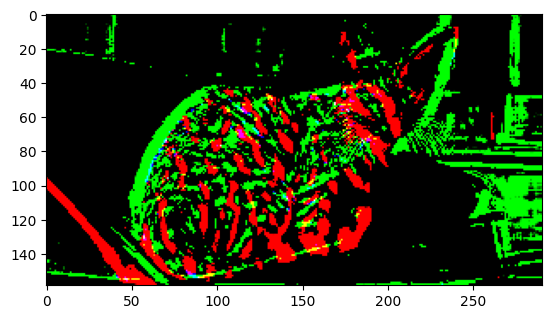

In [9]:
visualize_cat(model, cat)

นิยาม Model แบบ 2D Convolution โดยรับ Input Image   แบบ 3 Channel โดยมี Filter ขนาด 3 x 3 จำนวน 1 Filter

In [10]:
model = Sequential()
model.add(Conv2D(1,(3,3),input_shape=cat.shape))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


ทดลอง visualize ภาพโดยใช้แบบ 3 มิติแล้ว plot

1/1 [==============================] - 0s 62ms/step


[[[[ -30.291779]
   [ -30.395939]
   [ -30.553371]
   ...
   [ -38.012886]
   [ -37.680046]
   [ -37.680046]]

  [[ -30.112125]
   [ -30.553371]
   [ -30.907185]
   ...
   [ -37.82785 ]
   [ -38.007217]
   [ -38.007217]]

  [[ -30.89478 ]
   [ -31.23825 ]
   [ -30.789944]
   ...
   [ -38.62829 ]
   [ -38.357853]
   [ -38.357853]]

  ...

  [[-107.33305 ]
   [-106.578606]
   [-106.00331 ]
   ...
   [ -72.13451 ]
   [ -74.38986 ]
   [ -75.407425]]

  [[-103.21548 ]
   [-103.686485]
   [-103.183464]
   ...
   [ -88.84072 ]
   [ -83.54838 ]
   [ -83.96701 ]]

  [[-101.74795 ]
   [-102.20376 ]
   [-103.60311 ]
   ...
   [ -93.073296]
   [ -95.39446 ]
   [ -95.58742 ]]]]
(166, 298, 1)


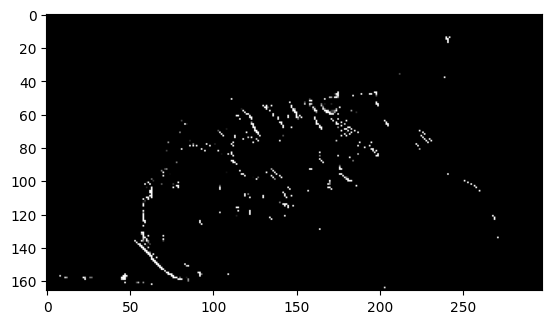

In [11]:
visualize_cat(model, cat)

# นิยาม  visualize_cat_one_channel Function ที่รับภาพเป็น Matrix ขยายภาพเป็น 4 มิติ แล้ว Predict ภาพ ก่อนจะหดให้เหลือ 2 มิติ เพื่อจะ Plot ภาพ แบบ 1 Channel ต่อไป

In [12]:
def visualize_cat_one_channel(model, cat):
    cat_batch = np.expand_dims(cat,axis=0)
    conv_cat2 = model.predict(cat_batch)
    conv_cat2 = np.squeeze(conv_cat2, axis=0)
    conv_cat2 = conv_cat2.reshape(conv_cat2.shape[:2])
    plt.imshow(conv_cat2)


1/1 [==============================] - 0s 34ms/step


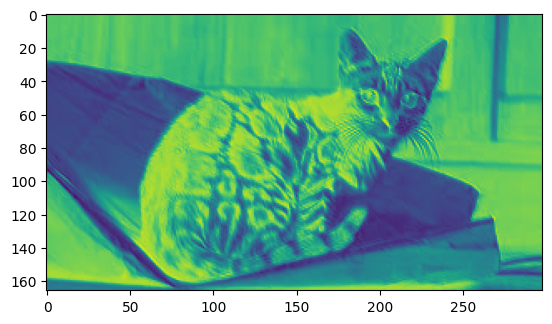

In [13]:
visualize_cat_one_channel(model, cat)

นิยาม Model แบบ 2D Convolution โดยรับ Input Image  แบบ 3 Channel โดยมี Filter ขนาด 20 x 20 จำนวน 1 Filter

In [34]:
model = Sequential()
model.add(Conv2D(1,(20,20),input_shape=cat.shape))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 149, 281, 1)       1201      
                                                                 
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________


In [33]:
visualize_cat_one_channel(model, cat)

1/1 [==============================] - 0s 108ms/step


ValueError: ignored

นิยาม Model แบบ 2D Convolution โดยรับ Input Image ขนาด 1,440x1,080 Pixel แบบ 3 Channel โดยมี Filter ขนาด 20 x 20 จำนวน 1 Filter และ เพิ่ม ReLu Activation Function

In [16]:
model = Sequential()
model.add(Conv2D(1,(20,20),input_shape=cat.shape))
model.add(Activation('relu'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 149, 281, 1)       1201      
                                                                 
 activation (Activation)     (None, 149, 281, 1)       0         
                                                                 
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 113ms/step


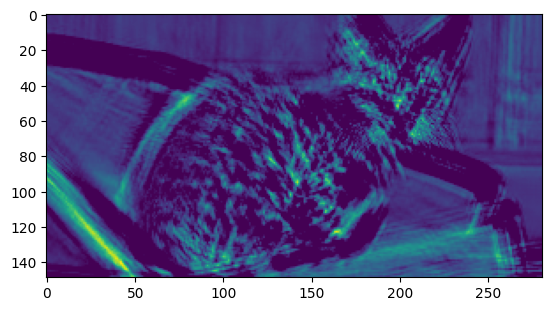

In [17]:
visualize_cat_one_channel(model, cat)

นิยาม Model แบบ 2D Convolution โดยรับ Input Image แบบ 3 Channel โดยมี Filter ขนาด 3 x 3 จำนวน 1 Filter และ เพิ่ม Max Pooling ขนาด 5 x 5

In [20]:
model = Sequential()
model.add(Conv2D(1,(3,3),input_shape=cat.shape))
model.add(MaxPooling2D(pool_size=(5,5)))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 33, 59, 1)        0         
 2D)                                                             
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 60ms/step


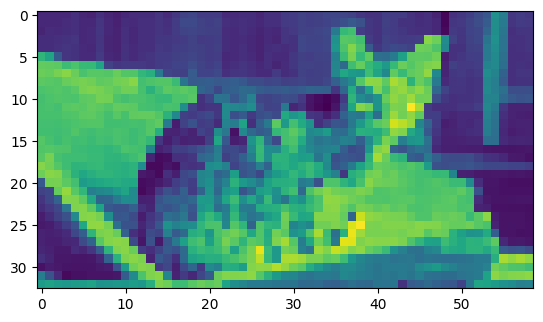

In [21]:
visualize_cat_one_channel(model, cat)

นิยาม Model แบบ 2D Convolution, ReLu Activation Function และ Max Pooling อย่างละ 2 Layer

In [30]:
model = Sequential()
model.add(Conv2D(1,(2,2),input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(1,(5,5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 167, 299, 1)       13        
                                                                 
 activation_9 (Activation)   (None, 167, 299, 1)       0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 55, 99, 1)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 51, 95, 1)         26        
                                                                 
 activation_10 (Activation)  (None, 51, 95, 1)         0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 31, 1)        0         
 g2D)                                                

1/1 [==============================] - 0s 68ms/step


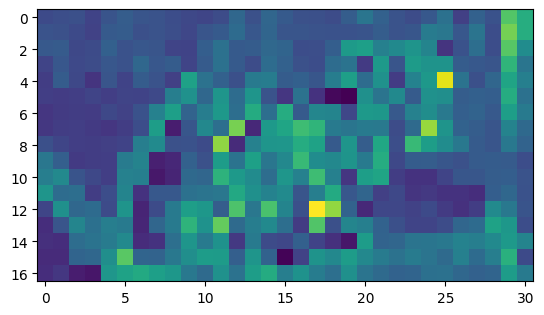

In [31]:
visualize_cat_one_channel(model, cat)